**Gabe Darley**

**CMPS 3240-01**

**Homework 6**

a. Generate two-dimensional data.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Generate random two dimensional data
X_one = np.random.uniform(-1, 1, 100)
X_two = np.random.uniform(-1, 1, 100)

X = np.dstack((np.ones(X_one.shape), X_one, X_two))[0]

b. Compute true labels.

In [22]:
#Establish arrays given by assignment
w1 = np.array([0, 1, -1])
w2 = np.array([0, 1, 1])

#Calculat hypotheses based on arrays
h1 = np.sign(np.matmul(X, np.transpose(w1)))
h2 = np.sign(np.matmul(X, np.transpose(w2)))

#Find sign of results from above, save indices
h1_pos = np.where(h1 == 1)[0]
h1_neg = np.where(h1 == -1)[0]
h2_pos = np.where(h2 == 1)[0]
h2_neg = np.where(h2 == -1)[0]

#XOR method to find true values
true_pos_one = np.intersect1d(h1_pos, h2_neg)
true_pos_two = np.intersect1d(h2_pos, h1_neg)
true_pos = np.concatenate((true_pos_one, true_pos_two))

true_neg = np.delete(np.arange(100), true_pos, 0)

c. Assign weight matrices and implement forward propagation.

In [23]:
#Establish weight matrices
W1 = np.array([w1, w2])
W2 = np.array([[-1.5, 1, -1], [-1.5, -1, 1]])
W3 = np.array([[1.5, 1, 1]])

W_list = [W1, W2, W3]
fp_list = []

#Run through every data point in X
for i in range(len(X)):
    #Start with [1, x1, x2] format of node
    current = X[i]
    
    #Pass through every level l of propagation
    for j in range(len(W_list)):
        #We are using theta = sign(s) for each point
        #s = np.matmul(current, np.transpose(W_list[j]))
        s = np.dot(current, np.transpose(W_list[j]))
        theta = np.sign(s)
        
        #Use this conditional to check if at last W, then we just need one value.
        if j == 2:
            current = theta[0]
        else:
            current = [1, theta[0], theta[1]]
    
    #Keep track of the theta values in list that was initialized earlier
    fp_list.append(current)

d. Use forward propagation to predict values, then calculate error.

In [24]:
#Make an easily comparable list of the true signs of each point
#Forward propagation list was already created in previous cell
true_list = [0] * 100
for i in true_pos:
    true_list[i] = 1.0
for i in true_neg:
    true_list[i] = -1.0

#Compute Squared Error, squaring difference of every pair of values between true and predicted lists
temp = (np.subtract(true_list, fp_list)) ** 2
e_sum = np.sum(temp)
        
e_in = e_sum / 100.
print("Squared Error for theta = sign(t): %f" % (e_in))

Squared Error for theta = sign(t): 0.000000


e. Try prediction again, using theta = tanh.

In [25]:
#Reset propagation list
fp_list = []

#Run through every data point in X
for i in range(len(X)):
    #Start with [1, x1, x2] format of node
    current = X[i]
    
    #Pass through every level l of propagation
    for j in range(len(W_list)):
        #We are using theta = sign(s) for each point
        s = np.matmul(current, np.transpose(W_list[j]))
        theta = np.tanh(s)
        
        #Use this conditional to check if at last W, then we just need one value.
        if j == 2:
            current = theta[0]
        else:
            current = [1, theta[0], theta[1]]
    
    #Keep track of the theta values in list that was initialized earlier
    fp_list.append(current)

#Calculate Squared Error
temp = (np.subtract(true_list, fp_list)) ** 2
e_sum = np.sum(temp)
        
e_in = e_sum / 100.
print("Squared Error for theta = tanh(t): %f" % (e_in))

Squared Error for theta = tanh(t): 0.714106


Graph of the points and their true values based on XOR method from before:

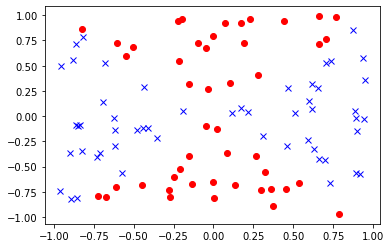

In [26]:
plt.clf()

plt.plot(X[true_pos, 1], X[true_pos, 2], 'ro')
plt.plot(X[true_neg, 1], X[true_neg, 2], 'bx')

plt.show()